In [94]:
%pwd

'/content'

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/MyDrive/딥러닝/data/house_train.csv'
df = pd.read_csv(path)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [96]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [98]:
#결측치 처리

df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [99]:
df.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrArea         8
Electrical         1
1stFlrSF           0
dtype: int64

In [100]:
# 카테고리(범주형)데이터 처리 >> 0, 1 (원핫인코딩) 변환
df = pd.get_dummies(df)

df[:10]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,False,False,False,True,False,False,False,False,True,False
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,False,False,False,True,False,False,False,False,True,False
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,False,False,False,True,False,False,False,False,True,False
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,False,False,False,True,True,False,False,False,False,False
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,False,False,False,True,False,False,False,False,True,False


In [101]:
#결측치 처리 (평균값 대체)

df = df.fillna(df.mean())
df[:10]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.000000,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.000000,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.000000,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.000000,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.000000,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
5,6,50,85.000000,14115,5,5,1993,1995,0.0,732,...,False,False,False,True,False,False,False,False,True,False
6,7,20,75.000000,10084,8,5,2004,2005,186.0,1369,...,False,False,False,True,False,False,False,False,True,False
7,8,60,70.049958,10382,7,6,1973,1973,240.0,859,...,False,False,False,True,False,False,False,False,True,False
8,9,50,51.000000,6120,7,5,1931,1950,0.0,0,...,False,False,False,True,True,False,False,False,False,False
9,10,190,50.000000,7420,5,6,1939,1950,0.0,851,...,False,False,False,True,False,False,False,False,True,False


In [102]:
df.isna().sum().sort_values(ascending=False).head(20)

SaleCondition_Partial    0
GarageFinish_Unf         0
GarageQual_Ex            0
GarageQual_Fa            0
GarageQual_Gd            0
GarageQual_Po            0
GarageQual_TA            0
GarageCond_Ex            0
GarageCond_Fa            0
GarageType_2Types        0
GarageType_Attchd        0
GarageType_Basment       0
GarageType_BuiltIn       0
GarageType_CarPort       0
GarageType_Detchd        0
GarageFinish_Fin         0
GarageFinish_RFn         0
Functional_Mod           0
Functional_Sev           0
Functional_Typ           0
dtype: int64

In [103]:
#EDA
#속성별 관련도 추출
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.037020,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018090,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.009689,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.015818,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009914,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.072074,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084241,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [104]:
df_corr = df.corr()
# 집 값과 관련이 큰 순서대로 저장

df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

In [105]:
df_corr_sort['SalePrice'].head(10).index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd'],
      dtype='object')

In [106]:
df_corr_sort['SalePrice'].head(10).values


array([1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
       0.61358055, 0.60585218, 0.56066376, 0.55310485, 0.53372316])

In [107]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd']

df[cols]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,BsmtQual_Ex,TotRmsAbvGrd
0,7,1710,2,548,856,856,2,False,8
1,6,1262,2,460,1262,1262,2,False,6
2,7,1786,2,608,920,920,2,False,6
3,7,1717,3,642,756,961,1,False,7
4,8,2198,3,836,1145,1145,2,False,9
...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,False,7
1456,6,2073,2,500,1542,2073,2,False,7
1457,7,2340,1,252,1152,1188,2,False,9
1458,5,1078,1,240,1078,1078,1,False,5


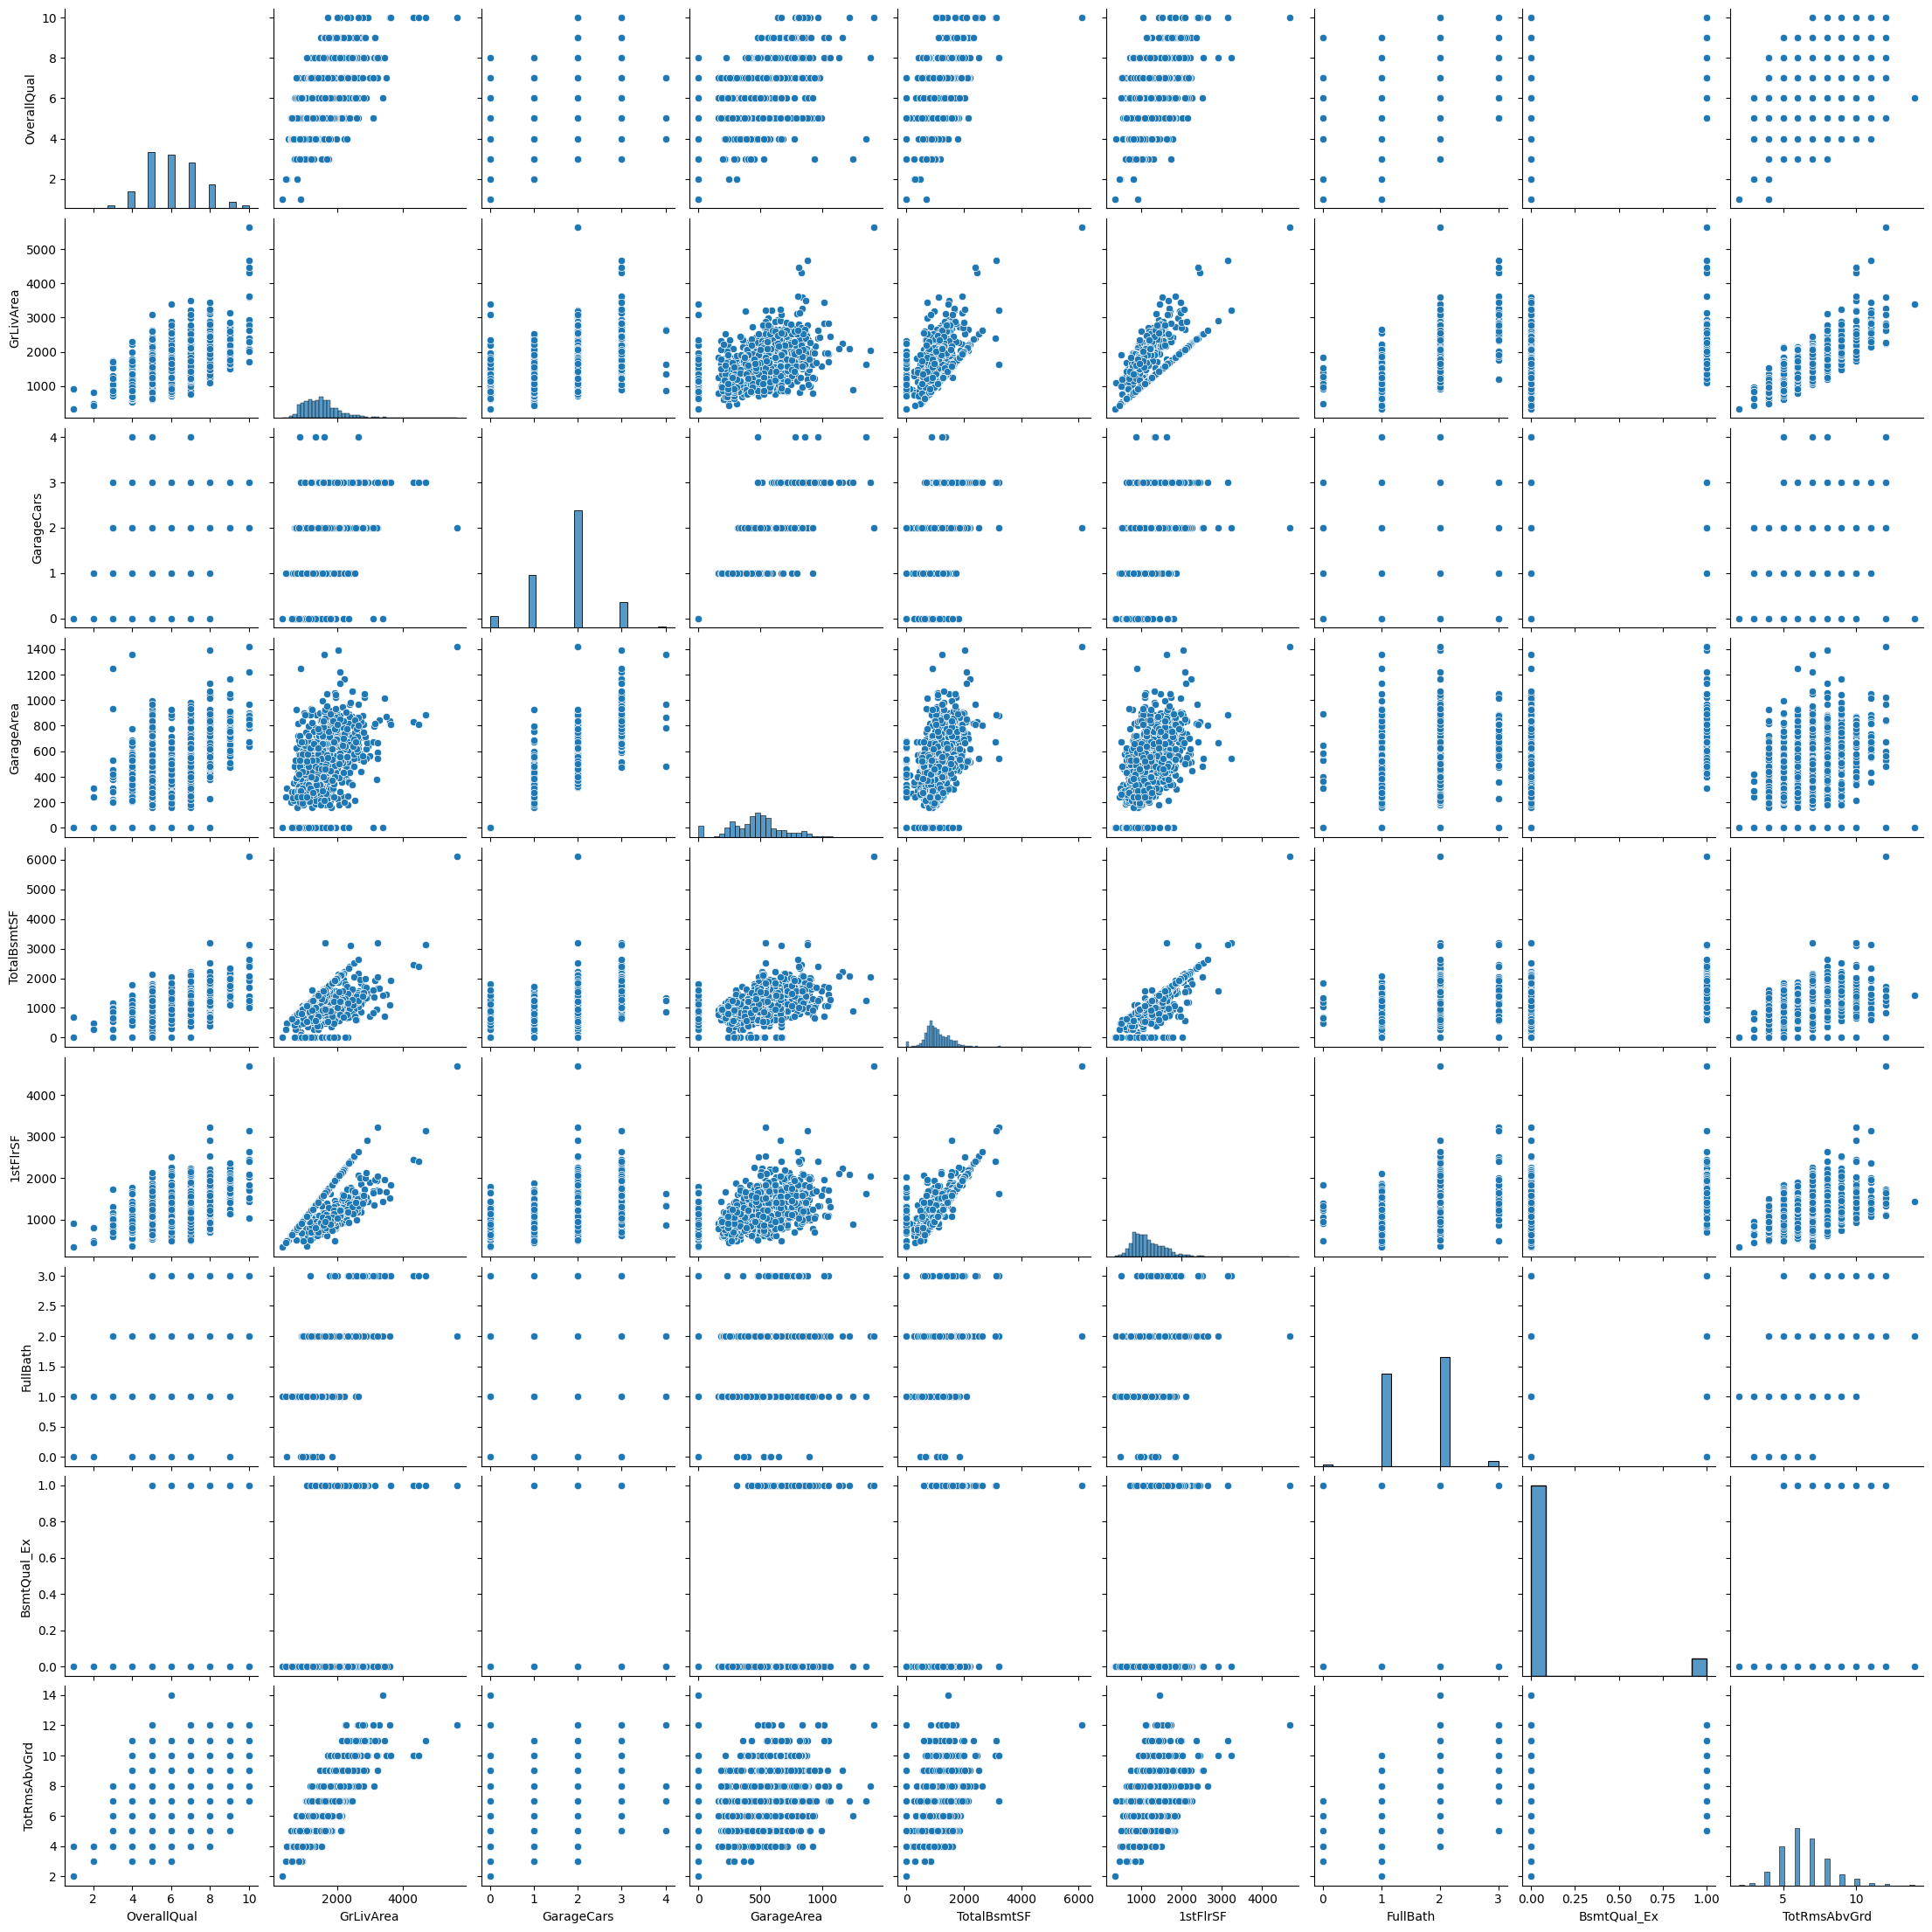

In [108]:
sns.pairplot(df[cols])
plt.show()

## 주택 가격 예측 모델

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split


In [110]:
#집값(SalePrice) 제외, 속성 정보만 추출

x = df[cols] # (9개 속성)
y = df['SalePrice'] # SalePrice

In [111]:
print(x)
print()
print(y)

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0               7       1710           2         548          856       856   
1               6       1262           2         460         1262      1262   
2               7       1786           2         608          920       920   
3               7       1717           3         642          756       961   
4               8       2198           3         836         1145      1145   
...           ...        ...         ...         ...          ...       ...   
1455            6       1647           2         460          953       953   
1456            6       2073           2         500         1542      2073   
1457            7       2340           1         252         1152      1188   
1458            5       1078           1         240         1078      1078   
1459            5       1256           1         276         1256      1256   

      FullBath  BsmtQual_Ex  TotRmsAbvGrd  
0      

In [112]:
#학습셋 , 테스트 셋 구분
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 )

In [113]:
#모델 실행
model = Sequential()
model.add(Dense(10, input_dim=9, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1)) #예측모델이니깐
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                100       
                                                                 
 dense_21 (Dense)            (None, 30)                330       
                                                                 
 dense_22 (Dense)            (None, 40)                1240      
                                                                 
 dense_23 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1711 (6.68 KB)
Trainable params: 1711 (6.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
#모델 예측
model.compile(loss='mean_squared_error', optimizer='adam')

#조기 종료
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#모델 이름 정하기
modelpath = '/content/drive/MyDrive/딥러닝/data/model/house.hdf5'

#최적화 모델 업데이트 >> 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)


In [115]:
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [116]:
history = model.fit(x_train, y_train, validation_split=0.25, epochs=2000, batch_size=32,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
17/28 [=================>............] - ETA: 0s - loss: 40962670592.0000 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 2s 32ms/step - loss: 40137056256.0000 - val_loss: 38484635648.0000
Epoch 2/2000
28/28 [==============================] - 0s 6ms/step - loss: 39841685504.0000 - val_loss: 38031896576.0000
Epoch 3/2000
28/28 [==============================] - 0s 6ms/step - loss: 39071703040.0000 - val_loss: 36840804352.0000
Epoch 4/2000
28/28 [==============================] - 0s 6ms/step - loss: 37066387456.0000 - val_loss: 33738391552.0000
Epoch 5/2000
28/28 [==============================] - 0s 7ms/step - loss: 32334413824.0000 - val_loss: 27065208832.0000
Epoch 6/2000
28/28 [==============================] - 0s 6ms/step - loss: 23376111616.0000 - val_loss: 16618342400.0000
Epoch 7/2000
28/28 [==============================] - 0s 5ms/step - loss: 11934769152.0000 - val_loss: 5856123904.0000
Epoch 8/2000
28/28 [==============================] - 0s 6ms/step - loss: 3816532224.0000 - val_loss: 2419439360.0000
Epoch 9/2000
28/28 [==============================] - 0

In [117]:
#예측값과 실제값, 실행번호가 들어간 빈 리스트 생성
real_price = []
pred_price = []
x_num = []

#임의로 40개 뽑아서 실제값, 예측값 출력
n_iter = 0

y_pred = model.predict(x_test).flatten()

for i in range(40):
    real = y_test[i]
    prediction = y_pred[i]
    print('실제가격: {:.2f}, 예상가격:  {:.2f}'.format(real,prediction))
    real_price.append(real)
    pred_price.append(prediction)
    n_iter += 1
    x_num.append(i)


10/10 [==============================] - 0s 2ms/step
실제가격: 208500.00, 예상가격:  200305.80
실제가격: 118858.00, 예상가격:  102569.62
실제가격: 179400.00, 예상가격:  170607.28
실제가격: 124500.00, 예상가격:  201589.05
실제가격: 119750.00, 예상가격:  123204.26
실제가격: 179665.00, 예상가격:  164202.95
실제가격: 206300.00, 예상가격:  203873.44
실제가격: 143900.00, 예상가격:  173355.50
실제가격: 142000.00, 예상가격:  179593.84
실제가격: 224500.00, 예상가격:  211102.08
실제가격: 121500.00, 예상가격:  204002.44
실제가격: 170000.00, 예상가격:  164690.95
실제가격: 194201.00, 예상가격:  206061.78
실제가격: 89500.00, 예상가격:  94628.68
실제가격: 284000.00, 예상가격:  262610.84
실제가격: 142000.00, 예상가격:  127151.23
실제가격: 129900.00, 예상가격:  131100.41
실제가격: 161000.00, 예상가격:  152144.50
실제가격: 119000.00, 예상가격:  125107.32
실제가격: 137500.00, 예상가격:  185969.17
실제가격: 79900.00, 예상가격:  105570.57
실제가격: 146000.00, 예상가격:  164441.50
실제가격: 235000.00, 예상가격:  249058.98
실제가격: 52000.00, 예상가격:  55732.84
실제가격: 106500.00, 예상가격:  61713.25
실제가격: 139000.00, 예상가격:  165793.12
실제가격: 131000.00, 예상가격:  134727.55
실제가격: 135000.00, 예상가격:  143235.78
실

In [118]:
col = [real_price, pred_price]

pd.DataFrame(col, index=['실제가격','예측가격']).T


,실제가격,예측가격
0,208500.0,200305.796875
1,118858.0,102569.625000
2,179400.0,170607.281250
3,124500.0,201589.046875
4,119750.0,123204.257812
5,179665.0,164202.953125
6,206300.0,203873.437500
7,143900.0,173355.500000
8,142000.0,179593.843750
9,224500.0,211102.078125


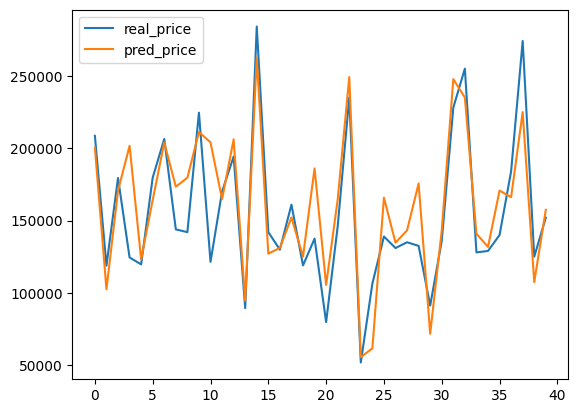

In [119]:
plt.plot(x_num, real_price, label='real_price')
plt.plot(x_num, pred_price, label='pred_price')
plt.legend()
plt.show()